In [ ]:
import os
count=0;
import cv2

In [ ]:
for filename in os.listdir('/content/fight-detection-surv-dataset/fight'):
  #print(filename)
  vidObj = cv2.VideoCapture('/content/fight-detection-surv-dataset/fight/'+filename) 
  while True: 
        success, image = vidObj.read() 
        #print(success)
        # Saves the frames with frame-count 
        if success:
          cv2.resize(image,(240,240));
          cv2.imwrite("/content/fight-detection-surv-dataset/Dataset/fight1/frame%d.jpg" % count, image) 
          count += 1
        else:
          break
  vidObj.release() 
  cv2.destroyAllWindows() 

In [ ]:
count=0

In [ ]:
for filename in os.listdir('/content/fight-detection-surv-dataset/noFight'):
  #print(filename)
  vidObj = cv2.VideoCapture('/content/fight-detection-surv-dataset/noFight/'+filename) 
  while True: 
        success, image = vidObj.read() 
        #print(success)
        # Saves the frames with frame-count 
        if success:
          cv2.resize(image,(240,240));
          cv2.imwrite("/content/fight-detection-surv-dataset/Dataset/nonfight1/frame%d.jpg" % count, image) 
          count += 1
        else:
          break
  vidObj.release() 
  cv2.destroyAllWindows() 

In [ ]:
from keras.applications.inception_v3 import InceptionV3
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
#from data import DataSet
import os.path

Using TensorFlow backend.


In [ ]:
def get_model(weights='imagenet'):
    # create the base pre-trained model
    base_model = InceptionV3(weights=weights, include_top=False)

    # add a global spatial average pooling layer
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    # let's add a fully-connected layer
    x = Dense(1024, activation='relu')(x)
    # and a logistic layer
    predictions = Dense(2, activation='softmax')(x)

    # this is the model we will train
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

In [ ]:
def get_generators():
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        horizontal_flip=True,
        rotation_range=10.,
        width_shift_range=0.2,
        height_shift_range=0.2)

    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        '/content/fight-detection-surv-dataset/Dataset',
        target_size=(299, 299),
        batch_size=32,
        class_mode='categorical')

    return train_generator,validation_generator

In [ ]:
model = get_model()
generators = get_generators()

In [ ]:
checkpointer = ModelCheckpoint(
    filepath=os.path.join('data', 'checkpoints', 'inception.{epoch:03d}.hdf5'),
    verbose=1,
    save_best_only=True)

# Helper: Stop when we stop learning.
early_stopper = EarlyStopping(patience=10)

# Helper: TensorBoard
tensorboard = TensorBoard(log_dir=os.path.join('data', 'logs'))

In [ ]:
def train_model(model, nb_epoch, generators, callbacks=[]):
    train_generator =generators
    model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=nb_epoch,
        callbacks=callbacks)
    return model

In [ ]:
def freeze_all_but_top(model):
    """Used to train just the top layers of the model."""
    # first: train only the top layers (which were randomly initialized)
    # i.e. freeze all convolutional InceptionV3 layers
    for layer in model.layers[:-2]:
        layer.trainable = False

    # compile the model (should be done *after* setting layers to non-trainable)
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

def freeze_all_but_mid_and_top(model):
    """After we fine-tune the dense layers, train deeper."""
    # we chose to train the top 2 inception blocks, i.e. we will freeze
    # the first 172 layers and unfreeze the rest:
    for layer in model.layers[:172]:
        layer.trainable = False
    for layer in model.layers[172:]:
        layer.trainable = True

    # we need to recompile the model for these modifications to take effect
    # we use SGD with a low learning rate
    model.compile(
        optimizer=SGD(lr=0.0001, momentum=0.9),
        loss='categorical_crossentropy',
        metrics=['accuracy', 'top_k_categorical_accuracy'])

    return model

In [ ]:
model = freeze_all_but_top(model)
model = train_model(model, 10, generators)

Epoch 1/10
100/100 [==============================] - 841s 8s/step - loss: 1.0963 - accuracy: 0.5888
Epoch 2/10
100/100 [==============================] - 838s 8s/step - loss: 0.6456 - accuracy: 0.6769
Epoch 3/10
100/100 [==============================] - 850s 9s/step - loss: 0.6277 - accuracy: 0.6809
Epoch 4/10
100/100 [==============================] - 848s 8s/step - loss: 0.5567 - accuracy: 0.7125
Epoch 5/10
100/100 [==============================] - 837s 8s/step - loss: 0.5416 - accuracy: 0.7250
Epoch 6/10
100/100 [==============================] - 838s 8s/step - loss: 0.5187 - accuracy: 0.7300
Epoch 7/10
100/100 [==============================] - 837s 8s/step - loss: 0.4804 - accuracy: 0.7609
Epoch 8/10
100/100 [==============================] - 913s 9s/step - loss: 0.4592 - accuracy: 0.7788
Epoch 9/10
100/100 [==============================] - 920s 9s/step - loss: 0.4366 - accuracy: 0.7816
Epoch 10/10
100/100 [==============================] - 914s 9s/step - loss: 0.4047 - accura

In [ ]:
  for file in os.listdir('/content/fight-detection-surv-dataset/Dataset'):
  print('/content/fight-detection-surv-dataset/Dataset/'+file)

/content/fight-detection-surv-dataset/Dataset/.ipynb_checkpoints
/content/fight-detection-surv-dataset/Dataset/nonfight1
/content/fight-detection-surv-dataset/Dataset/fight1


In [ ]:
import shutil 

location="/content/fight-detection-surv-dataset/Dataset"
path = os.path.join(location, '.ipynb_checkpoints') 
print(path)
# removing directory 
shutil.rmtree(path) 

/content/fight-detection-surv-dataset/Dataset/.ipynb_checkpoints


In [ ]:
for file in os.listdir('/content/fight-detection-surv-  dataset/Dataset'):
  print('/content/fight-detection-surv-dataset/Dataset/'+file)

/content/fight-detection-surv-dataset/Dataset/nonfight1
/content/fight-detection-surv-dataset/Dataset/fight1


In [ ]:
model = freeze_all_but_mid_and_top(model)
model = train_model(model, 10, generators,
                        [checkpointer, early_stopper, tensorboard])

Epoch 1/10
100/100 [==============================] - 1593s 16s/step - loss: 0.2855 - accuracy: 0.8750 - top_k_categorical_accuracy: 1.0000
Epoch 2/10


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_loss available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,top_k_categorical_accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


100/100 [==============================] - 1578s 16s/step - loss: 0.2671 - accuracy: 0.8866 - top_k_categorical_accuracy: 1.0000
Epoch 3/10
100/100 [==============================] - 1585s 16s/step - loss: 0.2556 - accuracy: 0.8934 - top_k_categorical_accuracy: 1.0000
Epoch 4/10
100/100 [==============================] - 1612s 16s/step - loss: 0.2357 - accuracy: 0.9062 - top_k_categorical_accuracy: 1.0000
Epoch 5/10
100/100 [==============================] - 1603s 16s/step - loss: 0.2208 - accuracy: 0.9084 - top_k_categorical_accuracy: 1.0000
Epoch 6/10
100/100 [==============================] - 1602s 16s/step - loss: 0.2049 - accuracy: 0.9178 - top_k_categorical_accuracy: 1.0000
Epoch 7/10
100/100 [==============================] - 1583s 16s/step - loss: 0.1875 - accuracy: 0.9291 - top_k_categorical_accuracy: 1.0000
Epoch 8/10
100/100 [==============================] - 1604s 16s/step - loss: 0.1787 - accuracy: 0.9369 - top_k_categorical_accuracy: 1.0000
Epoch 9/10
100/100 [===========

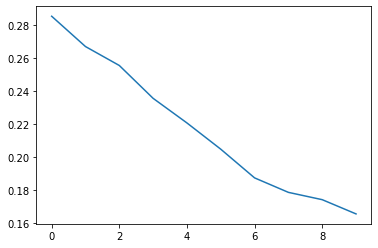

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['loss'])

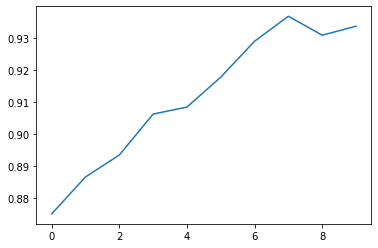

In [ ]:
  plt.plot(model.history.history['accuracy'])

In [ ]:

#for filename in os.listdir('/content/fight-detection-surv-dataset/noFight'):
  #print(filename)
vidObj = cv2.VideoCapture('/content/test/fi008.mp4') 
while True: 
        success, image = vidObj.read() 
        #print(success)
        # Saves the frames with frame-count 
        if success:
          cv2.resize(image,(299,299));
          cv2.imwrite("/content/test/test_frame/frame%d.jpg" % count, image) 
          count += 1
        else:
          break
vidObj.release() 
cv2.destroyAllWindows() 

In [ ]:
import numpy as np

In [ ]:
for image1 in os.listdir('/content/test/test_frame'):
  image = cv2.imread(os.path.join('/content/test/test_frame',image1))
  if image is not None:
      #x = image.img_to_array(img)
      x = np.expand_dims(image, axis=0)

      images = np.vstack([x])
      classes = model.predict(images, batch_size=10)
      print(classes[0])
      if classes[0][0]>0.5:
          print("Fighting recorded")
      else:
          print("No fight")
            
  

[1.000000e+00 4.653767e-24]
Fighting recorded
[1.0000000e+00 1.5264563e-26]
Fighting recorded
[1.0000000e+00 4.0827327e-27]
Fighting recorded
[1.0000000e+00 6.3054104e-22]
Fighting recorded
[1.0000000e+00 1.5512298e-24]
Fighting recorded
[1.0000000e+00 1.3220109e-26]
Fighting recorded
[1.00000000e+00 1.29726635e-27]
Fighting recorded
[1.000000e+00 8.692969e-21]
Fighting recorded
[1.0000000e+00 1.7417293e-22]
Fighting recorded
[1.000000e+00 4.099348e-22]
Fighting recorded
[1.0000000e+00 1.0421657e-24]
Fighting recorded
[1.0000000e+00 1.2532053e-22]
Fighting recorded
[1.000000e+00 6.817247e-24]
Fighting recorded
[1.0000000e+00 8.1557945e-29]
Fighting recorded
[1.000000e+00 2.352124e-25]
Fighting recorded
[1.0000000e+00 1.0744644e-24]
Fighting recorded
[1.0000000e+00 1.3421037e-24]
Fighting recorded
[1.000000e+00 3.429441e-26]
Fighting recorded
[1.0000000e+00 1.3730086e-24]
Fighting recorded
[1.0000000e+00 1.7146443e-26]
Fighting recorded
[1.0000000e+00 1.7942898e-24]
Fighting recorded
[1